In [1]:
from numpy import *

In [2]:
class treeNode:
    def __init__(self,feat,val,right,left):
        featuretosplit = feat
        valueofsplit = val
        rightbranch = right
        leftbranch = left

In [20]:
#type(treeNode.__name__=='dict')

bool

In [3]:
def binsplitdata(data,feature,value):
    data = mat(data)
    mat0 = data[nonzero(data[:,feature]>value)[0],:]
    mat1 = data[nonzero(data[:,feature]<=value)[0],:]
    return mat0,mat1

In [4]:
data = mat([[1,2,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
data

matrix([[1, 2, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])

In [5]:
data[nonzero(data[:,1]>0)[0],:]

matrix([[1, 2, 0, 0],
        [0, 1, 0, 0]])

In [6]:
binsplitdata(data,1,0)

(matrix([[1, 2, 0, 0],
         [0, 1, 0, 0]]), matrix([[0, 0, 1, 0],
         [0, 0, 0, 1]]))

In [7]:
def regleaf(data):
    return mean(data[:,-1])
regleaf(data[:,:2])

0.75

In [8]:
def regerr(data):
    return var(data[:,-1])* shape(data)[0]
regerr(data)

0.75

In [9]:
def createTree(data,leafType=regleaf,errType=regerr,ops=(1,4)):
    feat,val = choosebestsplit(data,leafType,errType,ops)
    if feat == None:
        return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    lSet,rSet = binsplitdata(data,feat,val)
    retTree['left'] = createTree(lSet,leafType,errType,ops)
    retTree['right'] = createTree(rSet,leafType,errType,ops)
    return retTree

In [10]:
t = data[:,-1] - mean(data[:,-1])
s = 0.
for i in t:
    s += i**2
s

matrix([[ 0.75]])

In [11]:
test = mat([[1],[2],[1]])

In [12]:
def count_dict(data):
    data = data.reshape((-1,)).A[0]
    dict_count = {}
    for i in data:
        dict_count[i]=1
    return dict_count
set(count_dict(test))

{1, 2}

In [13]:
def choosebestsplit(data,leafType=regleaf,errType=regerr,ops=(1,4)):
    data = mat(data)
    m,n = data.shape
    
    tols = ops[0]
    tolN = ops[1]
    
    if len(set(data[:,-1].T.tolist()[0]))==1:
        return None,leafType(data)
    
    S = regerr(data)
    best_s = inf
    best_feat = 0 
    best_val = 0
    
    for i in range(n-1): # n-1 feature
        for j in set(count_dict(data[:,i])): # python3 中这里没法直接使用 set(data[:,i])
            mat0,mat1 = binsplitdata(data,i,j)
            if (shape(mat0)[0]<tolN) or (shape(mat1)[0]<tolN):
                continue
            new_s = errType(mat0) + errType(mat1)
            if new_s < best_s:
                best_feat = i
                best_val = j
                best_s = new_s   
                
    if (S-best_s)<tols:
        return None,leafType(data)
    mat0,mat1 = binsplitdata(data,best_feat,best_val)
    if (shape(mat0)[0]<tolN) or (shape(mat1)[0]<tolN):
        return None,leafType(data)
    return best_feat,best_val

In [14]:
path = '/Users/luokui/Documents/机器学习实战/机器学习实战及配套代码/machinelearninginaction/Ch09/'
path = path +'ex0.txt'
path 

'/Users/luokui/Documents/机器学习实战/机器学习实战及配套代码/machinelearninginaction/Ch09/ex0.txt'

In [15]:
def loaddata(path):
    data = []
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            temp = line.strip().split('\t')
            temp = [float(i) for i in temp]
            data.append(temp)
    return mat(data)
data = loaddata(path)

In [16]:
createTree(data)

{'left': {'left': {'left': 3.9871631999999999,
   'right': 2.9836209534883724,
   'spInd': 1,
   'spVal': 0.79758300000000004},
  'right': 1.980035071428571,
  'spInd': 1,
  'spVal': 0.58200200000000002},
 'right': {'left': 1.0289583666666666,
  'right': -0.023838155555555553,
  'spInd': 1,
  'spVal': 0.19783400000000001},
 'spInd': 1,
 'spVal': 0.39434999999999998}

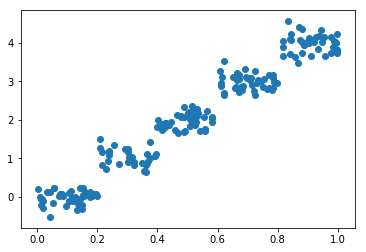

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1].A,data[:,2].A)
plt.show()

In [21]:
def isTree(obj):
    return (type(obj).__name__=='dict')

def getMean(tree):
    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    return (tree['left'] + tree['right'])/2.0


In [ ]:
def prune(tree,testData):
    if shape(testData)[0] == 0:
        return getMean(tree)
    
    if (isTree(tree['right']) or isTree(tree['left'])):
        lSet,rSet = binsplitdata(testData,tree['spInd'],tree['spVal'])
        
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'],lSet)
        
    if isTree(tree['right']):
        tree['right'] = prune(tree['right'],rSet)
        
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet,rSet = binsplitdata(testData,tree['spInd'],tree['spVal'])
        errorNoMerge = sum(power(lSet[:,-1] - tree['left'],2)) + sum(power(rSet[:,-1] - tree['right'])/2.0)
        
        treeMean(tree['left'] + tree['right']) / 2.0
        
        errorMerge = sum(power(testData[:,-1] - treeMean,2))
        if errorMerge < errorNoMerge:
            print("merging")
            return treeMean
        else:
            return tree
    else:
        return tree